In [45]:
#importing dependancies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [9]:
#loading the dataset to a pandas Dataframe
data = pd.read_csv('datasets/diamond_security_system.csv')

In [10]:
# printing the head of data
data.head()

,DiamondID,DiamondName,DateOfMining,OwnerName,DiamondPrice,DiamondRating,Carat,Cut,Color,Clarity,...,Fluorescence,Girdle,Culet,Length_CW_Ratio,Width_CW_Ratio,Height_CW_Ratio,Ang_Pav_Polish,Ang_Girdle,Ang_Culet,Authentic
0,GIA10000,Kohinoor,1526,Ananya Patel,576625,7.57,0.3,3,4,3.0,...,Faint,Thin,Large,1.037574,0.963787,0.854893,0.273462,5.100208,6.473731,1
1,GIA10001,Hope Diamond,1666,Aditya Sharma,557419,8.14,0.7,4,5,2.0,...,Faint,Thick,Large,1.475181,0.677883,0.555914,9.924448,3.329701,2.347622,1
2,GIA10002,Blue Moon Diamond,2014,Aarav Singh,665386,9.03,0.5,1,6,4.0,...,Medium,Medium,Large,1.153349,0.867040,0.687244,1.077413,8.218450,6.763676,1
3,GIA10003,Star of Africa,1905,Akshay Desai,456223,9.99,1.5,3,5,3.0,...,Faint,Medium,Small,0.517262,1.933256,0.435962,8.855525,4.592631,3.086526,1
4,GIA10004,Regent Diamond,1701,Bhavya Joshi,563894,9.32,0.9,2,7,0.1,...,NaN,Medium,Small,0.914433,1.093574,0.347979,4.132917,6.861855,7.191979,1


In [20]:
# number of rows and columns
data.shape

(301, 28)

In [12]:
# Check summary statistics
print(data.describe())

       DateOfMining   DiamondPrice  DiamondRating       Carat         Cut  \
count    301.000000     301.000000     301.000000  301.000000  301.000000   
mean    1914.431894  199663.767442       8.227575    0.902658    2.465116   
std       70.512643  271793.160832       1.007196    0.331350    1.114875   
min     1526.000000   18295.000000       6.510000    0.300000    1.000000   
25%     1863.000000   18485.000000       7.390000    0.600000    1.000000   
50%     1921.000000   18718.000000       8.260000    0.800000    2.000000   
75%     1974.000000  367691.000000       9.120000    1.200000    3.000000   
max     2022.000000  983637.000000      10.000000    1.500000    4.000000   

            Color     Clarity    Symmetry       Depth       Table     Length   \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean     6.069767    2.118272    2.013289   59.822632   59.908852    6.377651   
std      1.411305    1.436488    0.832560    6.006179    5.6900

In [13]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DiamondID          301 non-null    object 
 1   DiamondName        301 non-null    object 
 2   DateOfMining       301 non-null    int64  
 3   OwnerName          301 non-null    object 
 4   DiamondPrice       301 non-null    int64  
 5   DiamondRating      301 non-null    float64
 6   Carat              301 non-null    float64
 7   Cut                301 non-null    int64  
 8   Color              301 non-null    int64  
 9   Clarity            301 non-null    float64
 10  Symmetry           301 non-null    int64  
 11  Depth              301 non-null    float64
 12  Table              301 non-null    float64
 13   Length            301 non-null    float64
 14   Width             301 non-null    float64
 15   Height            301 non-null    float64
 16   Cut_Grade         301 non

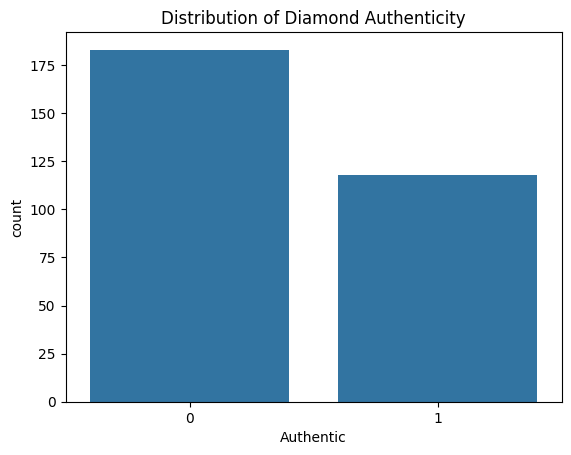

In [14]:
# Visualize the distribution of target variable
sns.countplot(x='Authentic', data=data)
plt.title('Distribution of Diamond Authenticity')
plt.show()

In [18]:
# Define a list of parameters (columns) to visualize
parameters = ['Carat', 'Cut', 'Color', 'Clarity', 'Symmetry']

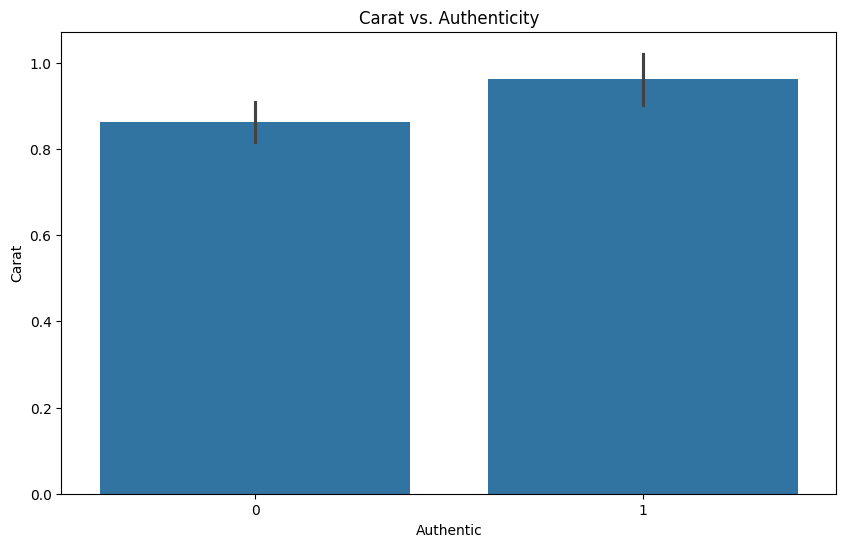

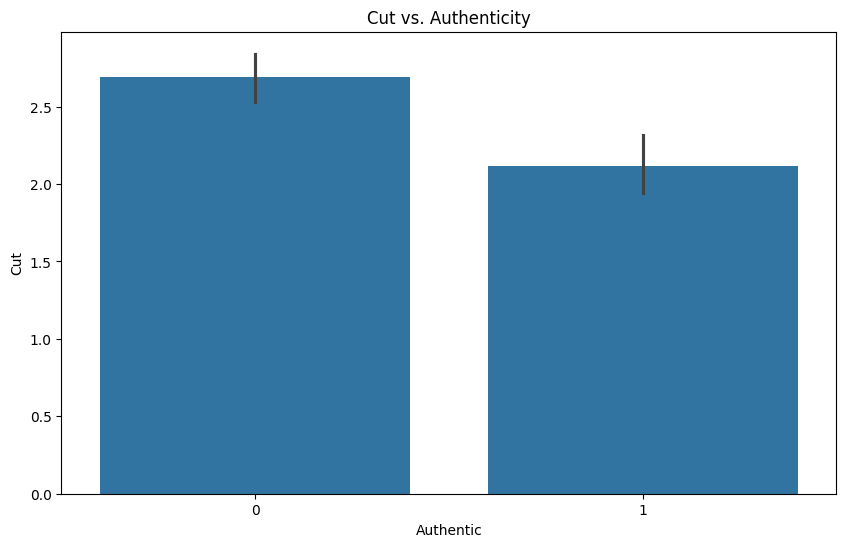

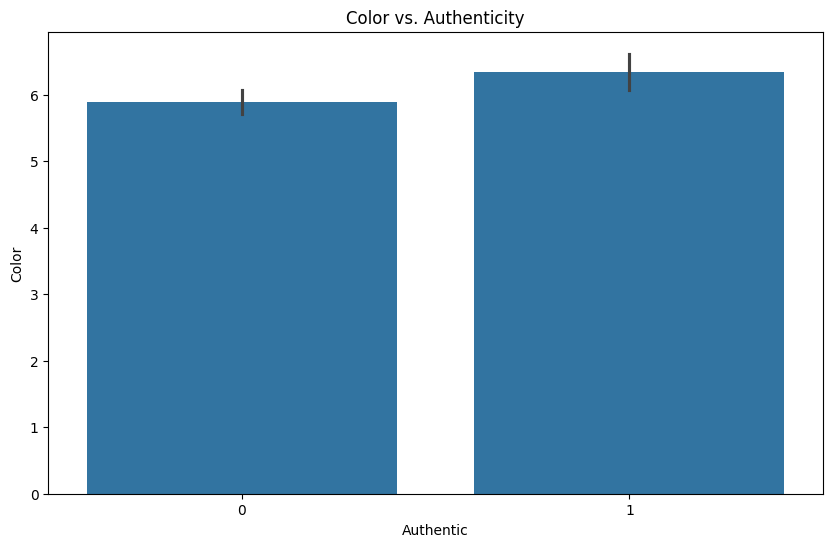

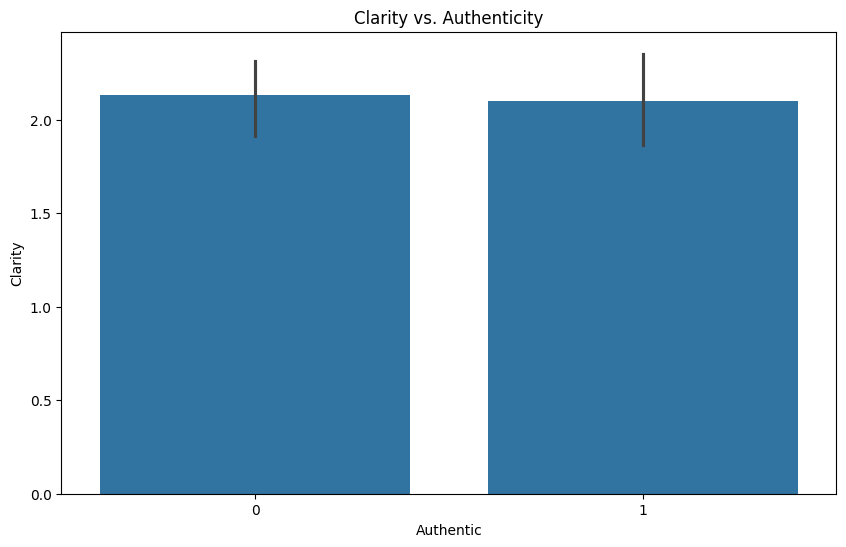

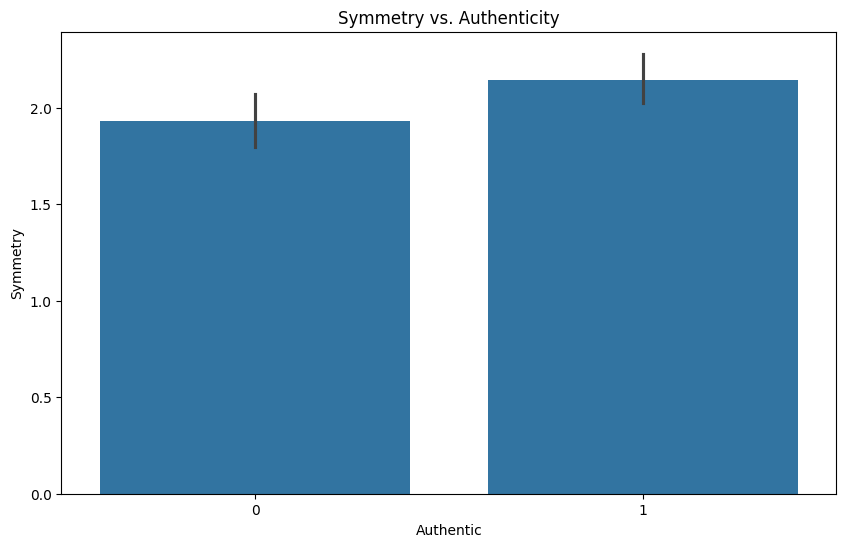

In [19]:
# Visualize each parameter against the target variable
for parameter in parameters:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Authentic', y=parameter, data=data)
    plt.title(f'{parameter} vs. Authenticity')
    plt.xlabel('Authentic')
    plt.ylabel(parameter)
    plt.show()

In [24]:
# Assuming diamond_df is your original dataset DataFrame
selected_columns = ['Carat', 'Cut', 'Color', 'Clarity', 'Symmetry', 'Authentic']
new_dataset = data[selected_columns].copy()

In [25]:
new_dataset.head()

,Carat,Cut,Color,Clarity,Symmetry,Authentic
0,0.3,3,4,3.0,3,1
1,0.7,4,5,2.0,2,1
2,0.5,1,6,4.0,3,1
3,1.5,3,5,3.0,3,1
4,0.9,2,7,0.1,1,1


In [26]:
new_dataset.shape

(301, 6)

In [27]:
# separating data and Labels
X = new_dataset.iloc[:,:-1]
print(X)

     Carat  Cut  Color  Clarity  Symmetry
0      0.3    3      4      3.0         3
1      0.7    4      5      2.0         2
2      0.5    1      6      4.0         3
3      1.5    3      5      3.0         3
4      0.9    2      7      0.1         1
..     ...  ...    ...      ...       ...
296    0.7    3      5      2.0         3
297    1.3    1      6      0.5         1
298    0.6    3      4      0.1         1
299    1.2    4      7      2.0         1
300    0.7    3      8      3.0         1

[301 rows x 5 columns]


In [28]:
Y = new_dataset.iloc[:,-1]
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
296    0
297    0
298    0
299    0
300    0
Name: Authentic, Length: 301, dtype: int64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(301, 5) (270, 5) (31, 5)


In [30]:
# use of SVC algorithm
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,Y_train)

SVC()

In [31]:
# accuracy of SVC algorithm

#accuracy on training data
X_train_prediction = model_svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of SVC=',ov )

Accuracy on training data :  0.7444444444444445
Accuracy on test data :  0.8064516129032258
Overall acuracy of SVC= 77.54480286738351


In [37]:
# use of Naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)

GaussianNB()

In [38]:
# accuracy of Naive bayes algorithm

#accuracy on training data
X_train_prediction = model_nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_nb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of GaussianNB=',ov )

Accuracy on training data :  0.7592592592592593
Accuracy on test data :  0.8064516129032258
Overall acuracy of GaussianNB= 78.28554360812426


In [34]:
# use of KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [36]:
# accuracy of KNN algorithm
#accuracy on training data
X_train_prediction = model_knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of KNN=',ov )

Accuracy on training data :  0.9296296296296296
Accuracy on test data :  0.967741935483871
Overall acuracy of KNN= 94.86857825567503


In [39]:
# use of decision trees algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
# accuracy of decision tree algorithm
#accuracy on training data
X_train_prediction = model_dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of DecisionTreeClassifier=',ov )

Accuracy on training data :  0.9962962962962963
Accuracy on test data :  0.967741935483871
Overall acuracy of DecisionTreeClassifier= 98.20191158900838


In [42]:
# use of random forest algorithm
from sklearn.ensemble import RandomForestClassifier
model_rfa = RandomForestClassifier()
model_rfa.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
# accuracy of decision tree algorithm

#accuracy on training data
X_train_prediction = model_rfa.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_rfa.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of DecisionTreeClassifier=',ov )

Accuracy on training data :  0.9962962962962963
Accuracy on test data :  0.967741935483871
Overall acuracy of DecisionTreeClassifier= 98.20191158900838


Confusion Matrix for Testing


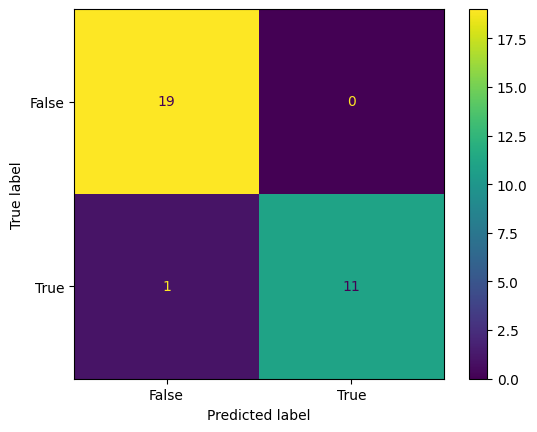

In [46]:
actual = Y_test
predicted = X_test_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion Matrix for Testing")
cm_display.plot()
plt.show()

Confusion Matrix for Training


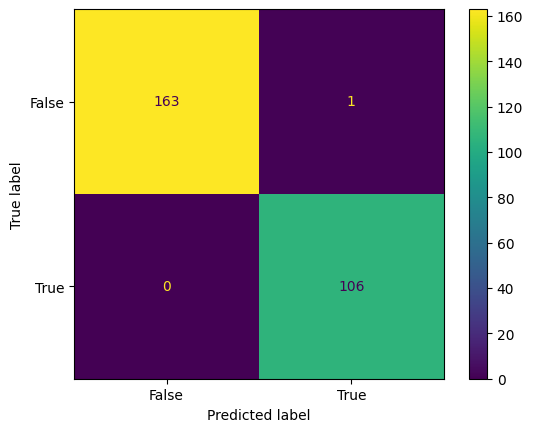

In [47]:
actual = Y_train
predicted = X_train_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion Matrix for Training")
cm_display.plot()
plt.show()

In [48]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy*100)

99.62962962962963


In [49]:
Precision = metrics.precision_score(actual, predicted)
print(Precision*100)

99.06542056074767


In [50]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall*100)

100.0


In [51]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity*100)

99.39024390243902


In [52]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score*100)

99.53051643192488


In [54]:
carat = float(input("enter the  weight of the diamond in carat weight : "))
cut = float(input("enter the cut of the diamond : "))
color = float(input("enter the color of the diamond : "))
clarity = float(input("enter the clarity of the diamond : "))
symmetry = float(input("enter the symmentry of the diamond : "))

input_data = [carat,cut,color,clarity,symmetry]

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_rfa.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Diamond is a real diamond')
else:
  print('Diamond is a fake diamond')


enter the  weight of the diamond in carat weight :  0.7
enter the cut of the diamond :  4
enter the color of the diamond :  5
enter the clarity of the diamond :  2.0
enter the symmentry iof the diamond :  2


[1]
Diamond is a real diamond


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
import pickle
pickle.dump(model_rfa,open('five_parameter_rfa.pkl','wb'))